# 6. Analýza dat

In [4]:
import sys
from pathlib import Path

ROOT = Path("..").resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

In [6]:
# Imports a načtení datasetu

from src.wur.eda import (
    numeric_summary, plot_university_trend, country_trends,
    corr_matrix, show_corr_heatmap, corr_with_targets
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_parquet(Path("../data/clean/wur_dataset.parquet"))
print("Počet řádků:", len(df))
print("Sloupce:", list(df.columns))
df.head()

Počet řádků: 16328
Sloupce: ['year', 'university', 'country', 'rank', 'overall_score', 'teaching', 'research', 'citations', 'industry_income', 'international_outlook']


,year,university,country,rank,overall_score,teaching,research,citations,industry_income,international_outlook
0,2016,AGH University of Krakow,Poland,601.0,0.00,14.2,3.7,35.7,0.0,17.9
1,2017,AGH University of Krakow,Poland,601.0,23.05,16.1,11.0,40.3,36.6,19.4
2,2018,AGH University of Krakow,Poland,601.0,26.05,18.6,12.3,35.6,35.7,20.3
3,2019,AGH University of Krakow,Poland,801.0,22.45,16.6,13.1,26.6,36.7,20.4
4,2020,AGH University of Krakow,Poland,1001.0,16.40,17.7,13.5,23.6,38.3,20.7


## 6.1 Deskriptivní statistika
Základní statistiky pro numerické sloupce datasetu (průměr, medián, kvartily, směrodatná odchylka).

In [7]:
numeric_summary(df)

,count,mean,std,min,25%,50%,75%,max
year,16328.0,2020.398518,3.652679,2011.0,2018.0,2021.0,2023.0,2025.0
rank,16328.0,628.548996,431.648298,1.0,251.0,601.0,1001.0,1501.0
overall_score,15526.0,35.616621,18.986125,0.0,18.5,33.25,47.85,98.5
teaching,16328.0,29.865544,14.96274,8.2,19.3,25.5,35.8,99.7
research,16328.0,25.638321,18.49737,0.8,12.2,19.4,33.0,100.0
citations,16328.0,51.292841,26.885546,0.7,27.8,51.3,73.925,100.0
industry_income,16147.0,46.88357,20.242602,0.0,34.8,39.8,55.4,100.0
international_outlook,16319.0,48.534855,22.718704,7.1,29.5,44.5,64.6,100.0


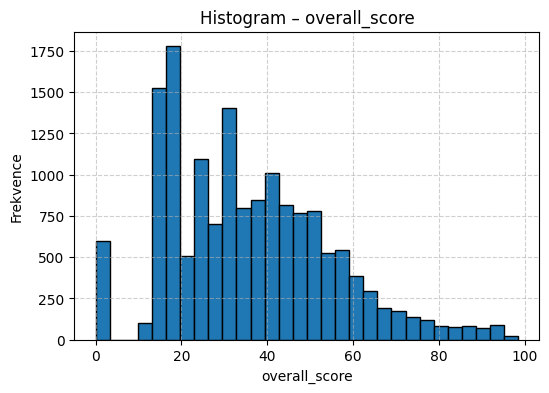

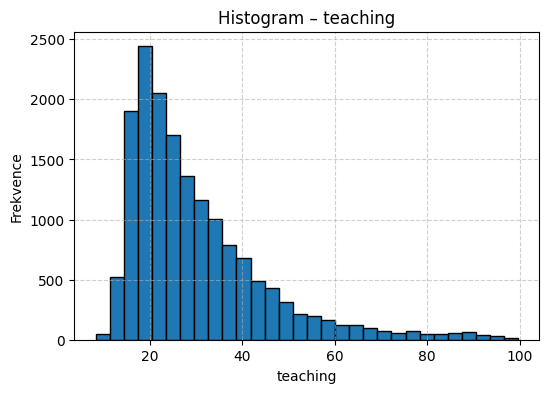

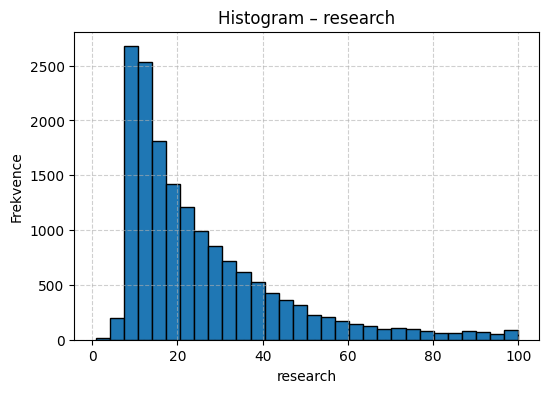

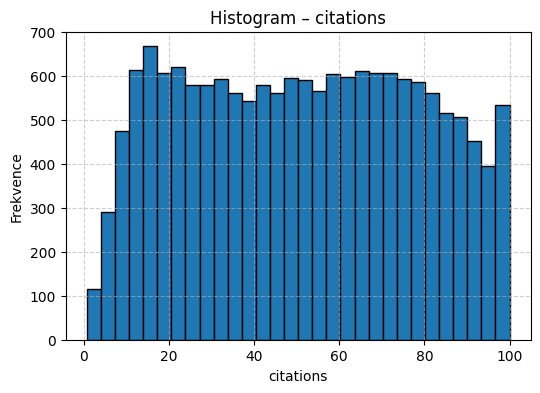

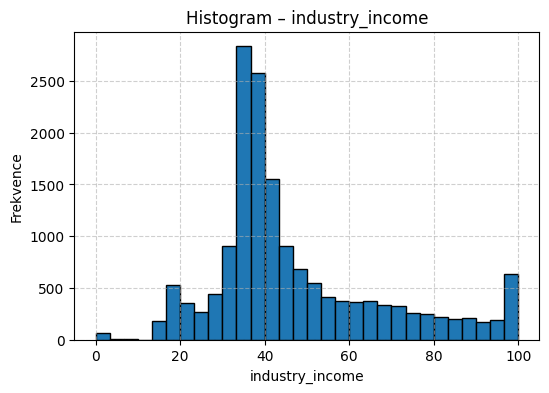

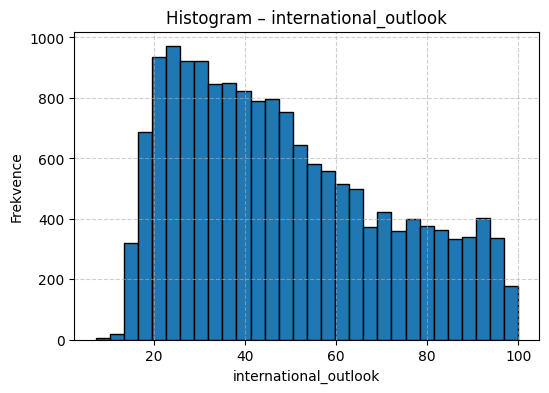

In [8]:
indicators = ["overall_score","teaching","research","citations","industry_income","international_outlook"]

for col in indicators:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=30, edgecolor="black")
        plt.title(f"Histogram – {col}")
        plt.xlabel(col)
        plt.ylabel("Frekvence")
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

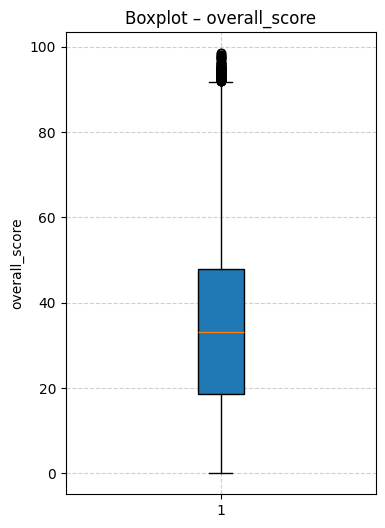

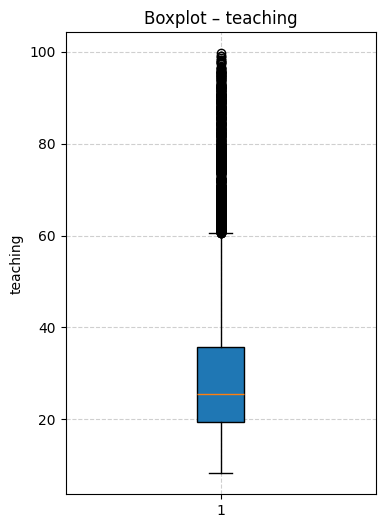

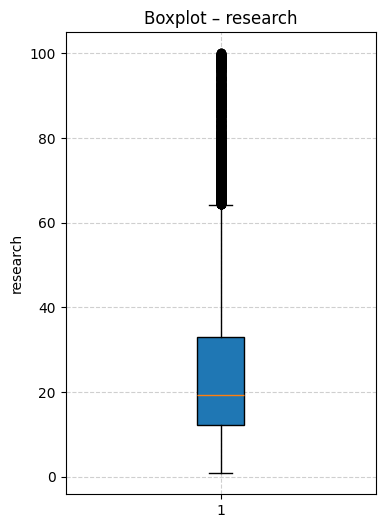

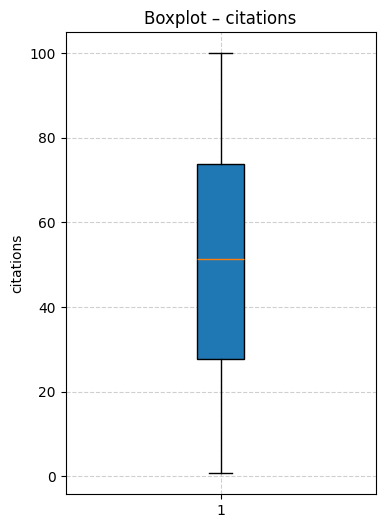

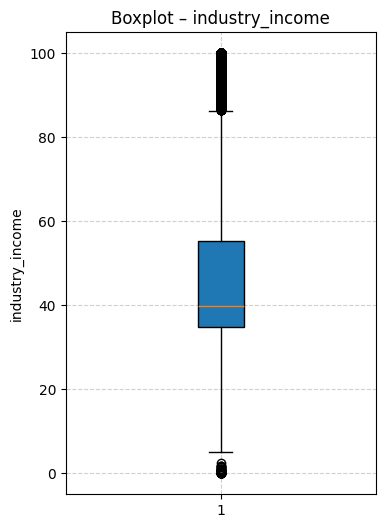

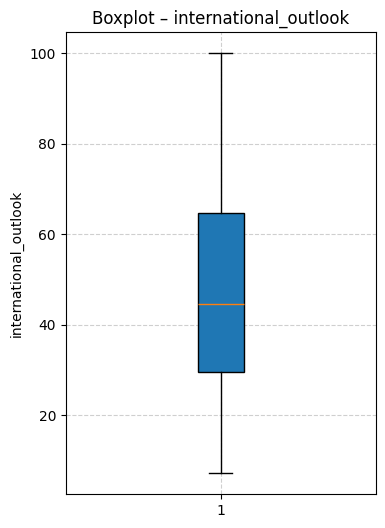

In [9]:
for col in indicators:
    if col in df.columns:
        plt.figure(figsize=(4,6))
        plt.boxplot(df[col].dropna(), vert=True, patch_artist=True)
        plt.title(f"Boxplot – {col}")
        plt.ylabel(col)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()

## 6.2 Vizualizace trendů
Trend vybrané univerzity v čase (např. overall_score) a agregované trendy podle zemí (průměrná hodnota).

In [16]:
# Zvolení univerzity z datasetu
target = "University of Economics in Prague"
sub = df[df["university"] == target]
if sub.empty:
    raise ValueError(f"{target!r} v datasetu nenalezena.")
example_university = target
example_university

'University of Economics in Prague'

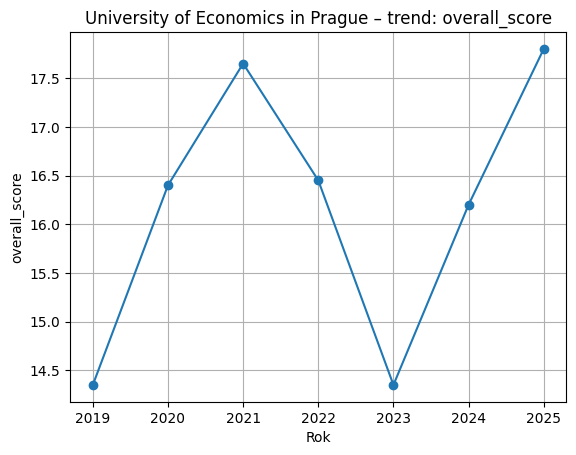

In [17]:
# Trend celkového skóre u vybrané univerzity
plot_university_trend(df, example_university, metric="overall_score")

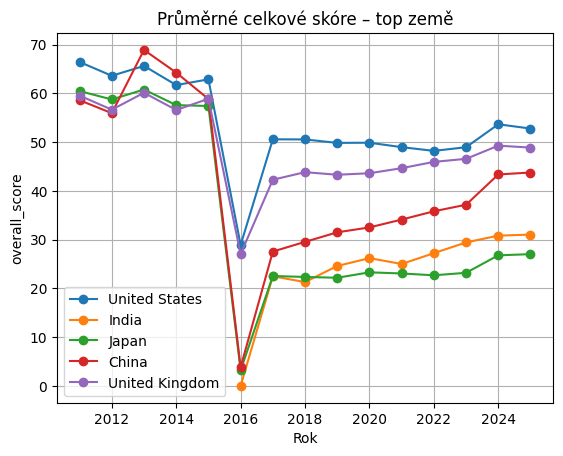

In [18]:
# Agregované trendy: průměrné overall_score v čase pro TOP N zemí podle počtu univerzit
country_trends(df, top_n=5)

## 6.3 Korelace indikátorů
Korelační matice pro klíčové indikátory a její vizualizace (heatmapa).

In [19]:
cols = ["overall_score","teaching","research","citations","industry_income","international_outlook"]
corr = corr_matrix(df, cols)
corr

,overall_score,teaching,research,citations,industry_income,international_outlook
overall_score,1.000000,0.806907,0.858090,0.820599,0.481499,0.584940
teaching,0.806907,1.000000,0.898659,0.529927,0.473974,0.339370
research,0.858090,0.898659,1.000000,0.599498,0.550512,0.473622
citations,0.820599,0.529927,0.599498,1.000000,0.291990,0.551994
industry_income,0.481499,0.473974,0.550512,0.291990,1.000000,0.235789
international_outlook,0.584940,0.339370,0.473622,0.551994,0.235789,1.000000


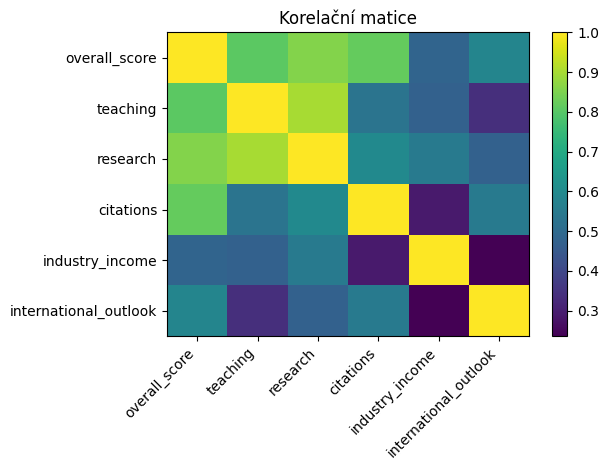

In [20]:
show_corr_heatmap(corr)

## 6.4 Předběžná identifikace klíčových faktorů
Korelace jednotlivých numerických rysů s cíli (overall_score a případně rank).

In [21]:
res = corr_with_targets(df, targets=("overall_score","rank"))
for target, series in res.items():
    display(series.to_frame(name=f"corr_with_{target}"))

,corr_with_overall_score
overall_score,1.000000
research,0.858090
citations,0.820599
teaching,0.806907
international_outlook,0.584940
industry_income,0.481499
rank,-0.769236


,corr_with_rank
rank,1.000000
industry_income,-0.454049
international_outlook,-0.538713
teaching,-0.644586
research,-0.708629
overall_score,-0.769236
citations,-0.779825


In [22]:
if "overall_score" in res:
    top10 = res["overall_score"].dropna().abs().sort_values(ascending=False).head(10)
    print("Top 10 absolutních korelací s overall_score:")
    display(top10.to_frame("abs_corr"))

Top 10 absolutních korelací s overall_score:


,abs_corr
overall_score,1.000000
research,0.858090
citations,0.820599
teaching,0.806907
rank,0.769236
international_outlook,0.584940
industry_income,0.481499
